<a href="https://colab.research.google.com/github/Cgaz275/PTDL/blob/main/PTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas seaborn Bokeh matplotlib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CheckboxGroup, CustomJS
from bokeh.io import output_notebook
from bokeh.plotting import figure

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Contents/HR_comma_sep.csv")

# Làm sạch dữ liệu
*  Kiểm tra các giá trị null
*  Kiểm tra dữ liệu trùng lắp






In [ ]:
#Kiểm tra tổng các giá trị null trong mỗi thuộc tính
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [ ]:
#Loại bỏ dữ liệu có giá trị null
df.dropna(inplace=True)

In [ ]:
#Kiểm tra trùng lắp
df.duplicated().sum()

np.int64(3008)

In [ ]:
#Loại bỏ các giá trị trùng
df.drop_duplicates(inplace=True)

# Nội dung 1 - Châu Gia Anh


In [ ]:
#Kiểm tra tổng số cột và hàng của dữ liệu : (hàng, cột)
df.shape

(11991, 10)

In [ ]:
# Các thông tin về kiểu dữ liệu, tên trường
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [ ]:
# Miêu tả các thông số cơ bản của dữ liệu
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


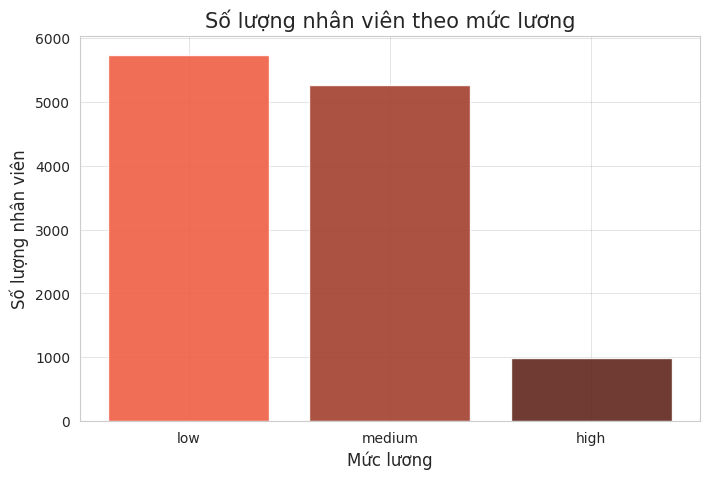

In [ ]:

# Đếm số lượng nhân viên theo từng mức lương
salary_counts = df['salary'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(salary_counts.index, salary_counts.values, color=['#F05E43', '#A33F2E', '#5F251B'], alpha = 0.9)

# Thêm tiêu đề và nhãn
plt.grid("--", alpha=0.1, color="black")
plt.xlabel("Mức lương", size = 12)
plt.ylabel("Số lượng nhân viên", size = 12)
plt.title("Số lượng nhân viên theo mức lương", size = 15)

# Hiển thị biểu đồ
plt.show()

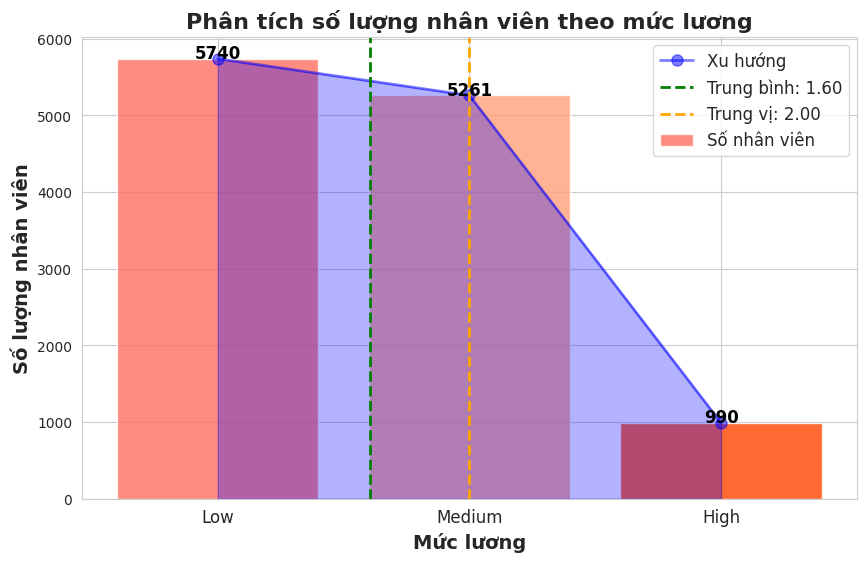

In [ ]:
# BƯỚC 1: Chuyển đổi mức lương sang số
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['salary'] = df['salary'].map(salary_mapping)

# BƯỚC 2: Đếm số lượng nhân viên theo mức lương
salary_counts = df['salary'].value_counts().sort_index()

# BƯỚC 3: Tính toán thống kê cơ bản
mean_salary = df['salary'].mean()
median_salary = df['salary'].median()
std_salary = df['salary'].std()
mode_salary = salary_counts.idxmax() if not salary_counts.empty else None  # Kiểm tra tránh lỗi

# BƯỚC 4: Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ cột
bars = plt.bar(salary_counts.index, salary_counts.values, color=['#FF6F61', '#FFA07A', '#FF4500'], label="Số nhân viên", alpha=0.8)

# Vẽ đường xu hướng
x_vals = salary_counts.index
y_vals = salary_counts.values
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue', markersize=8, linewidth=2, label="Xu hướng", alpha = 0.5)

# Vẽ vùng bóng dưới đường xu hướng
plt.fill_between(x_vals, y_vals, color='blue', alpha=0.3)

# Đánh dấu mức lương phổ biến nhất
if mode_salary is not None:
    for bar in bars:
        if bar.get_x() == mode_salary:
            bar.set_color("#D72638")  # Màu đỏ nổi bật

# Thêm nhãn giá trị trên từng cột & điểm xu hướng
for i, txt in enumerate(y_vals):
    plt.text(x_vals[i], y_vals[i] + 0.4, f"{txt}", ha='center', fontsize=12, color='black', fontweight='bold')

# Thêm đường trung bình & trung vị
plt.axvline(mean_salary, color="green", linestyle="--", lw=2, label=f"Trung bình: {mean_salary:.2f}")
plt.axvline(median_salary, color="orange", linestyle="--", lw=2, label=f"Trung vị: {median_salary:.2f}")

# Hoàn thiện biểu đồ
plt.xlabel("Mức lương", fontsize=14, fontweight='bold')
plt.ylabel("Số lượng nhân viên", fontsize=14, fontweight='bold')
plt.title("Phân tích số lượng nhân viên theo mức lương", fontsize=16, fontweight='bold')

# Đổi nhãn trục X thành chữ
plt.xticks(ticks=[1, 2, 3], labels=['Low', 'Medium', 'High'], fontsize=12)

# Hiển thị chú thích
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.show()


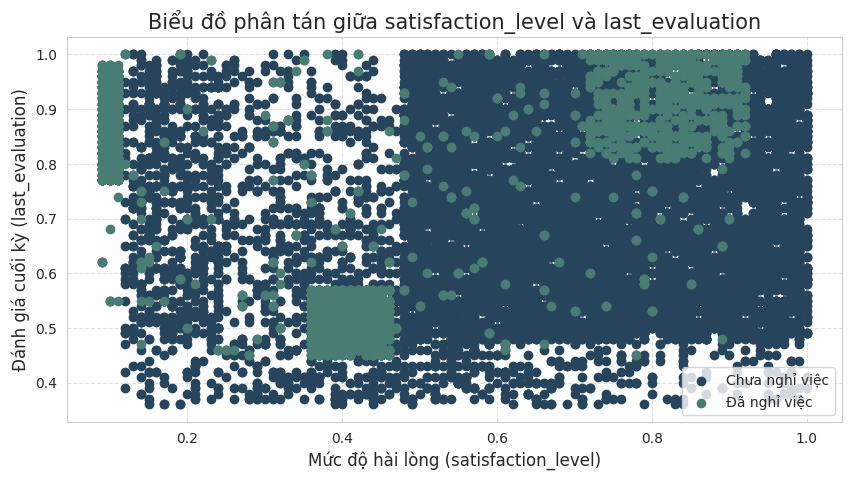

In [13]:
# Tạo hai nhóm: Nhân viên đã nghỉ và chưa nghỉ
df_left = df[df['left'] == 1]  # Nhân viên đã nghỉ việc
df_stay = df[df['left'] == 0]  # Nhân viên vẫn làm việc

# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 5))
plt.scatter(df_stay['satisfaction_level'], df_stay['last_evaluation'],
            color='#27445D', alpha=0.5, label="Chưa nghỉ việc")
plt.scatter(df_left['satisfaction_level'], df_left['last_evaluation'],
            color='#497D74', alpha=0.5, label="Đã nghỉ việc")

# Thêm tiêu đề và nhãn
plt.xlabel("Mức độ hài lòng (satisfaction_level)", size = 12)
plt.ylabel("Đánh giá cuối kỳ (last_evaluation)", size = 12)
plt.title("Biểu đồ phân tán giữa satisfaction_level và last_evaluation", size = 15)
plt.legend()  # Hiển thị chú thích
plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới giúp dễ nhìn

# Hiển thị biểu đồ
plt.show()

# Nội dung 2 - Đào Thị Thanh Tâm

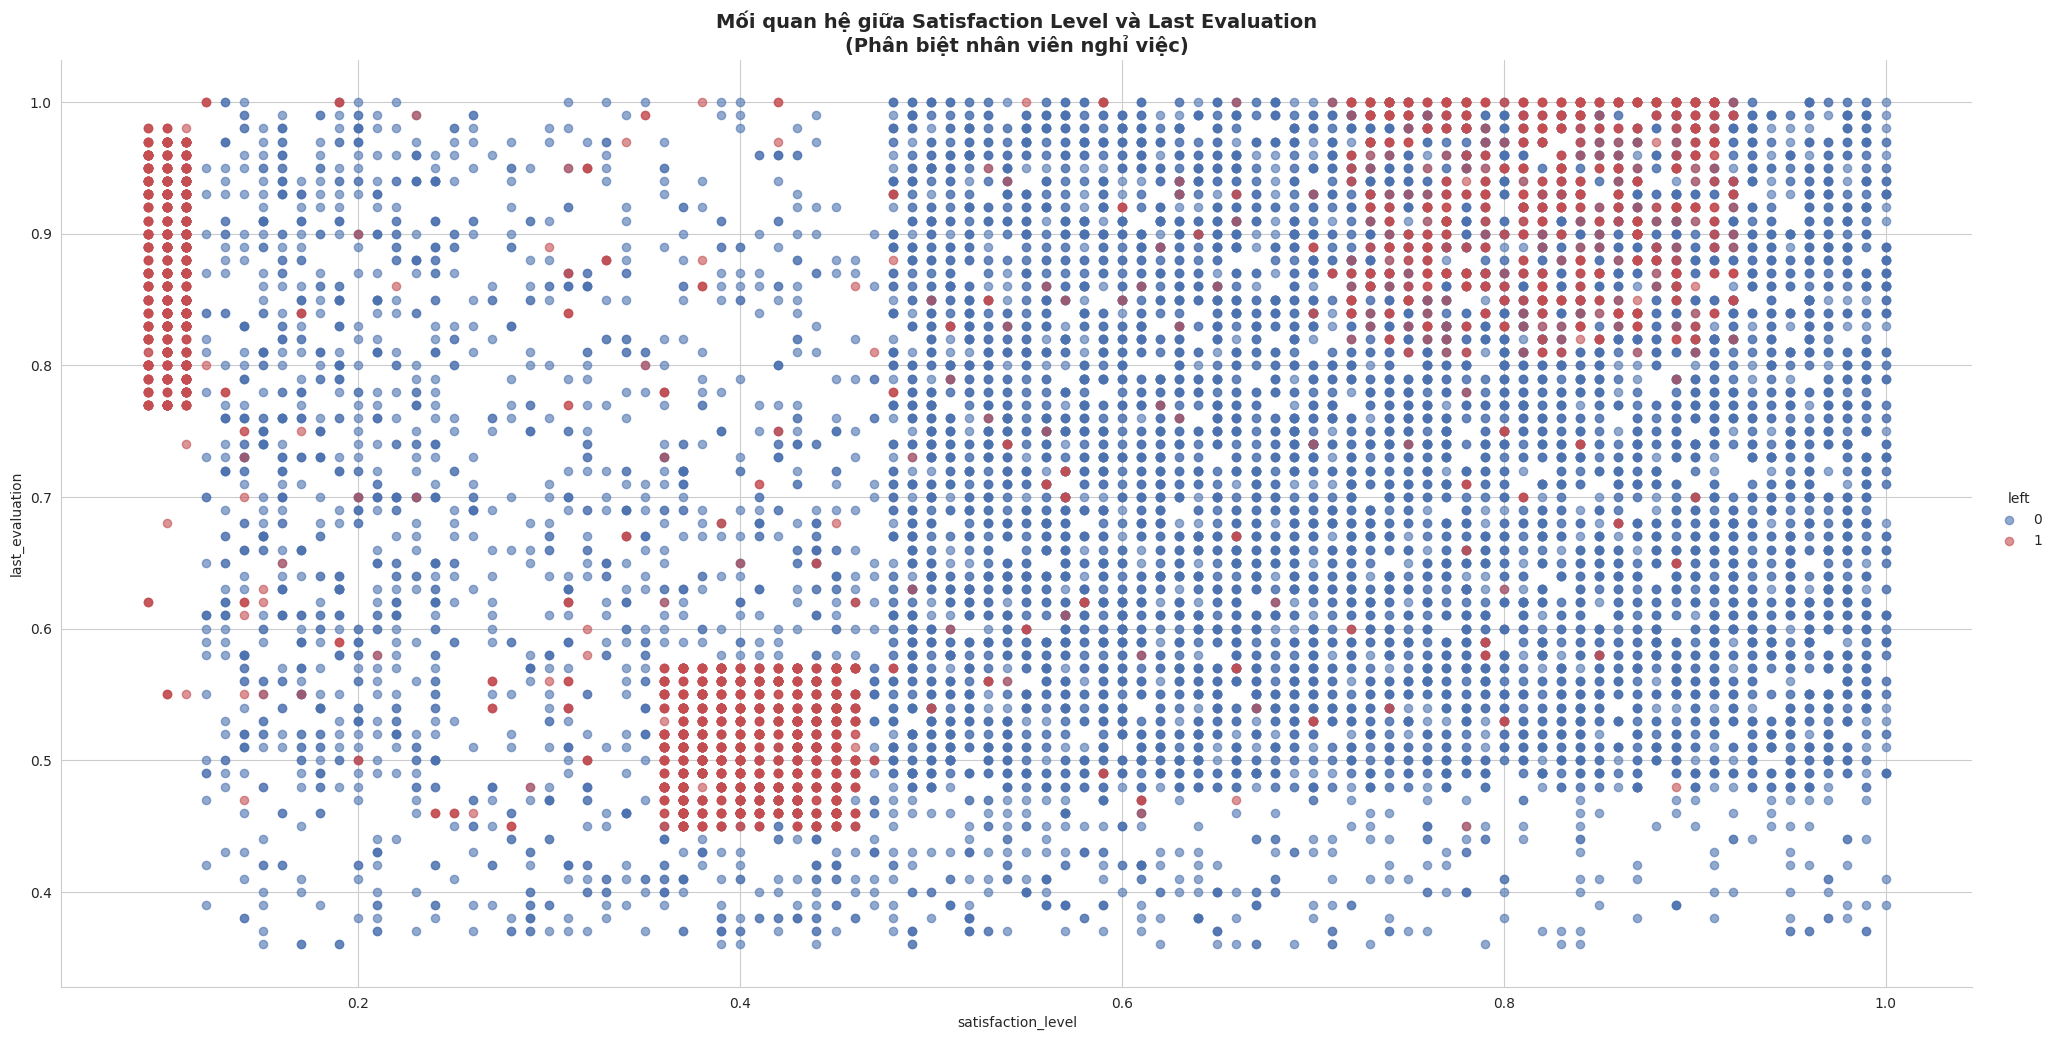

In [22]:
# im plot

pastel_palette = {0: "#4c72b0", 1: "#c44e52"}
sns.set_style("whitegrid")
sns.lmplot(
    x="satisfaction_level",
    y="last_evaluation",
    data=df,
    fit_reg=False,  # Không vẽ đường hồi quy
    hue="left",  # Phân biệt màu theo trạng thái nghỉ việc
    palette=pastel_palette,
    height=10,  # Chiều cao biểu đồ
    aspect=2,  # Tỷ lệ khung hình (rộng hơn)
    scatter_kws={'s': 35, 'alpha': 0.6}  # Kích thước điểm (s), độ trong suốt (alpha)
)

# Tùy chỉnh nhãn và tiêu đề
plt.title("Mối quan hệ giữa Satisfaction Level và Last Evaluation\n(Phân biệt nhân viên nghỉ việc)", fontsize=14, fontweight="bold")

# Hiển thị biểu đồ
plt.show()

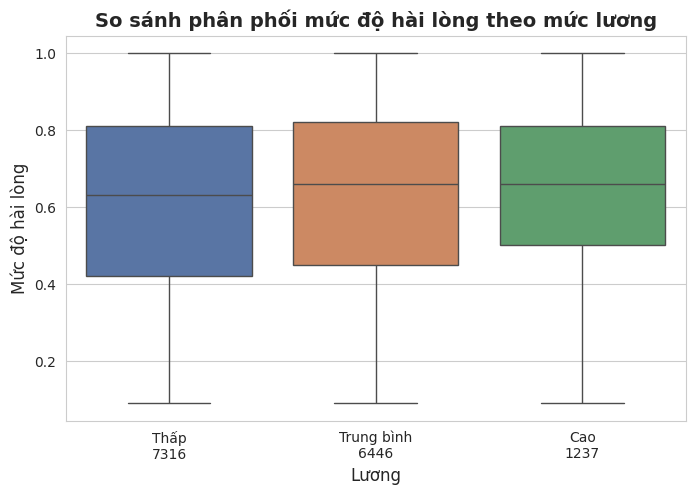

In [ ]:
 # box plot
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.boxplot(
    x='salary',
    y='satisfaction_level',
    data=df,
    hue='salary',
    palette="deep",

)
# Đếm số nhân viên theo từng mức lương
salary_counts = df['salary'].value_counts().reindex(df['salary'].unique())

salary_labels = {
    'low': 'Thấp',
    'medium': 'Trung bình',
    'high': 'Cao'
}

# Cập nhật tick labels
ax.set_xticks(range(len(salary_counts)))
ax.set_xticklabels([f"{salary_labels.get(cat, cat)}\n{salary_counts[cat]}" for cat in salary_counts.index])


plt.title("So sánh phân phối mức độ hài lòng theo mức lương", fontsize=14, fontweight='bold')
plt.xlabel("Lương", fontsize=12)
plt.ylabel("Mức độ hài lòng", fontsize=12)

plt.show()


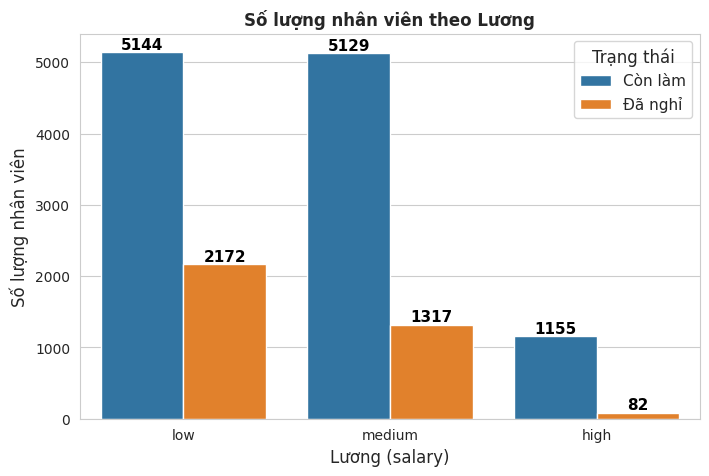

In [ ]:
# count plot
plt.figure(figsize=(8, 5))  # Điều chỉnh kích thước biểu đồ
sns.set_style("whitegrid")  # Cài đặt kiểu lưới
ax = sns.countplot(
    x='salary',
    data=df,
    hue='left',
    hue_order=[0, 1],  # Đảm bảo thứ tự 0 trước, 1 sau
    )

# Hiển thị số lượng nhân viên trên từng cột
for p in ax.patches:
    if p.get_height() > 0:  # Kiểm tra nếu cột có giá trị lớn hơn 0
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom',
            fontsize=11, fontweight='bold', color='black'
        )

# Cập nhật nhãn trục và tiêu đề
plt.title("Số lượng nhân viên theo Lương", fontweight='bold')
plt.xlabel("Lương (salary)", fontsize=12)
plt.ylabel("Số lượng nhân viên", fontsize=12)
plt.legend(title="Trạng thái", title_fontsize=12, fontsize=11)

# Chỉnh sửa legend (chú thích)
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Còn làm" if label == "0" else "Đã nghỉ" for label in labels]
plt.legend(handles, new_labels, title="Trạng thái", title_fontsize=12, fontsize=11)

plt.show()

#**Nhận xét**
###**Biểu đồ Implot**


- Đối với nhóm nhân viên rời đi:

Nhân viên có năng lực nhưng không hài lòng có nguy cơ nghỉ việc cao
Nhân viên hiệu suất kém và ít hài lòng dễ bị sa thải hoặc tự nghỉ việc
Nhân viên mới chưa đủ thời gian thể hiện năng lực, nhưng hài lòng với môi trường.


- Đối với nhóm ở lại:

Nhân viên hài lòng và có năng lực ổn định thường gắn bó lâu dài.
- Xu hướng:

Năng lực tốt nhưng không hài lòng ->nghỉ việc
Năng lực thấp và hài lòng thấp -> hiệu suất kém -> nghỉ việc

###**Biểu đồ boxplot**

- Xu hướng:

Mức độ hài lòng tỷ lệ thuận với mức lương -> Nhân viên lương cao mức độ hài lòng từ trung bình trở lên

Nhóm lương thấp có phân phối lệch xuống dưới -> Nhân viên lương thấp không hài lòng

=> Từ đó có thể thấy lương là yếu tố quan trọng ảnh hưởng đến sự hài lòng của nhân viên.

###**Biểu đồ countplot**

- Xu hướng:

Phân bố không đều, nhân viên ở mức lương thấp chiếm đa số, trong khi nhóm lương cao có ít nhân viên nhất.

Số lượng nhân viên giảm dần theo mức lương low > medium > high

####**Mối quan hệ giữa mức lương, mức độ hài lòng, đánh giá năng lực và tỷ lệ nghỉ việc:**

Nhóm lương thấp:

Chiếm đa số nhưng có mức độ hài lòng thấp -> Dễ nghỉ việc do mức độ hài lòng thấp hoặc bị sa thải do hiệu suất công việc thấp

Nhóm lương trung bình:

Có số lượng nhân viên vừa phải và mức độ hài lòng cao hơn nhóm lương thấp -> Nhóm ổn định, có thể đào tạo để thăng tiến

Nhóm lương cao:

Có số lượng nhân viên ít nhất, có mức độ hài lòng cao và ổn định có thể gắn bó lâu dài

# Nội dung 3 - Dương Lê Khánh


In [ ]:
output_notebook()

### 📊 1. Biểu đồ cột: Số lượng nhân viên theo Mức lương (salary) ###
salary_counts = df["salary"].value_counts()

bar_source = ColumnDataSource(data={
    'mức_lương': salary_counts.index.tolist(),  # Mức lương (salary)
    'số_lượng': salary_counts.values.tolist()   # Số lượng nhân viên
})

bar_chart = figure(x_range=[str(x) for x in salary_counts.index.tolist()],  # Chuyển index thành chuỗi
    title="Số lượng nhân viên theo Mức lương",
    x_axis_label="Mức lương (salary)",
    y_axis_label="Số lượng nhân viên",
    width=800,
    height=400)

bar_chart.vbar(x='mức_lương', top='số_lượng', width=0.6, source=bar_source, color="#FF9800")

### 🎯 2. Biểu đồ phân tán: Mức độ hài lòng (satisfaction_level) vs Đánh giá gần nhất (last_evaluation) ###
color_map = {0: "#7B1FA2", 1: "#00BFA5"}  # 0: Tím, 1: Xanh ngọc
  # 1: Đã nghỉ việc, 0: Còn làm việc
colors = [color_map[left] for left in df["left"]]

scatter_source = ColumnDataSource(data={
    'mức_độ_hài_lòng': df['satisfaction_level'],  # Mức độ hài lòng (satisfaction_level)
    'đánh_giá_gần_nhất': df['last_evaluation'],  # Đánh giá gần nhất (last_evaluation)
    'số_dự_án': df['number_project'],  # Số lượng dự án (number_project)
    'giờ_làm_việc_tb_tháng': df['average_montly_hours'],  # Giờ làm trung bình/tháng (average_montly_hours)
    'số_năm_công_tác': df['time_spend_company'],  # Số năm làm việc (time_spend_company)
    'tai_nạn_lao_động': df['Work_accident'],  # Tai nạn lao động (Work_accident)
    'nghỉ_việc': df['left'],  # Nghỉ việc hay không (left)
    'được_thăng_chức_5_năm': df['promotion_last_5years'],  # Được thăng chức trong 5 năm (promotion_last_5years)
    'phòng_ban': df['sales'],  # Phòng ban (sales)
    'mức_lương': df['salary'],  # Mức lương (salary)
    'màu': colors
})

scatter_plot = figure(title="Biểu đồ phân tán: Mức độ hài lòng vs Đánh giá gần nhất",
                      x_axis_label="Mức độ hài lòng (satisfaction_level)",
                      y_axis_label="Đánh giá gần nhất (last_evaluation)",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

scatter_plot.scatter('mức_độ_hài_lòng', 'đánh_giá_gần_nhất', source=scatter_source, size=5, color='màu', alpha=0.6)

hover = HoverTool()
hover.tooltips = [
    ("Mức độ hài lòng", "@mức_độ_hài_lòng"),
    ("Đánh giá gần nhất", "@đánh_giá_gần_nhất"),
    ("Số dự án", "@số_dự_án"),
    ("Giờ làm trung bình/tháng", "@giờ_làm_việc_tb_tháng"),
    ("Số năm công tác", "@số_năm_công_tác"),
    ("Tai nạn lao động", "@tai_nạn_lao_động"),
    ("Nghỉ việc", "@nghỉ_việc"),
    ("Thăng chức trong 5 năm", "@được_thăng_chức_5_năm"),
    ("Phòng ban", "@phòng_ban"),
    ("Mức lương", "@mức_lương")
]
scatter_plot.add_tools(hover)

### 🏗️ Xếp dọc 2 biểu đồ ###
layout = column(bar_chart, scatter_plot)
show(layout)


In [ ]:


output_notebook()  # Hiển thị trong Jupyter Notebook

### 🎯 Biểu đồ phân tán: Satisfaction Level vs Last Evaluation ###
color_map = {0: "#7B1FA2", 1: "#00BFA5"}  # 0: Tím, 1: Xanh ngọc

# Dữ liệu chia theo nhóm
df_0 = df[df["left"] == 0]
df_1 = df[df["left"] == 1]

source_0 = ColumnDataSource(data={'x': df_0['satisfaction_level'], 'y': df_0['last_evaluation'], 'salary': df_0['salary']})
source_1 = ColumnDataSource(data={'x': df_1['satisfaction_level'], 'y': df_1['last_evaluation'], 'salary': df_1['salary']})

scatter_plot = figure(title="Scatter Plot: Satisfaction Level vs Last Evaluation",
                      x_axis_label="Satisfaction Level",
                      y_axis_label="Last Evaluation",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

# Thêm 2 nhóm dữ liệu với màu sắc khác nhau
scatter_0 = scatter_plot.scatter('x', 'y', source=source_0, size=5, color=color_map[0], alpha=0.6, legend_label="Chưa nghỉ việc")
scatter_1 = scatter_plot.scatter('x', 'y', source=source_1, size=5, color=color_map[1], alpha=0.6, legend_label="Đã nghỉ việc")

hover = HoverTool()
hover.tooltips = [("Salary", "@salary")]
scatter_plot.add_tools(hover)

### 🔘 Thêm Checkbox để ẩn/hiện nhóm ###
checkbox = CheckboxGroup(labels=["Chưa nghỉ việc", "Đã nghỉ việc"], active=[0, 1])  # Mặc định cả 2 đều hiển thị

# CustomJS để điều khiển visibility
callback = CustomJS(args={'scatter_0': scatter_0, 'scatter_1': scatter_1, 'checkbox': checkbox}, code="""
    scatter_0.visible = checkbox.active.includes(0);
    scatter_1.visible = checkbox.active.includes(1);
""")
checkbox.js_on_change("active", callback)

### 🏗️ Xếp dọc Checkbox và Scatter Plot ###
layout = column(checkbox, scatter_plot)
show(layout)


In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, RangeSlider, CustomJS
from bokeh.layouts import column
import pandas as pd

output_notebook()

# Đọc dữ liệu từ CSV
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Contents/HR_comma_sep.csv")

# Xác định giá trị min và max cho thanh trượt
min_value = df['satisfaction_level'].min()
max_value = df['satisfaction_level'].max()

# Biểu đồ phân tán - Mức độ hài lòng (satisfaction_level) vs Đánh giá gần nhất (last_evaluation)
color_map = {0: "#7B1FA2", 1: "#00BFA5"}  # 0: Chưa nghỉ việc (Tím), 1: Đã nghỉ việc (Xanh ngọc)
colors = [color_map[left] for left in df["left"]]

scatter_source = ColumnDataSource(data={
    'mức_độ_hài_lòng': df['satisfaction_level'],  # Mức độ hài lòng (satisfaction_level)
    'đánh_giá_gần_nhất': df['last_evaluation'],  # Đánh giá gần nhất (last_evaluation)
    'mức_lương': df['salary'],  # Mức lương (salary)
    'nghỉ_việc': df['left'].astype(str),  # Nghỉ việc (left)
    'màu': colors
})

scatter_plot = figure(title="Biểu đồ phân tán: Mức độ hài lòng vs Đánh giá gần nhất",
                      x_axis_label="Mức độ hài lòng (satisfaction_level)",
                      y_axis_label="Đánh giá gần nhất (last_evaluation)",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

scatter_plot.scatter('mức_độ_hài_lòng', 'đánh_giá_gần_nhất', source=scatter_source, size=5, color='màu', alpha=0.6)  # Giảm size từ 8 xuống 5

hover = HoverTool()
hover.tooltips = [("Mức lương", "@mức_lương"), ("Nghỉ việc", "@nghỉ_việc")]
scatter_plot.add_tools(hover)

# Thanh trượt lọc theo mức độ hài lòng
range_slider = RangeSlider(start=min_value, end=max_value, value=(min_value, max_value), step=0.01, title="Khoảng mức độ hài lòng", sizing_mode="stretch_width")

slider_callback = CustomJS(args=dict(source=scatter_source, original_source=scatter_source.data), code="""
    var data = source.data;
    var original_data = original_source;
    var range = cb_obj.value;

    var new_x = [];
    var new_y = [];
    var new_salary = [];
    var new_left = [];
    var new_color = [];

    for (var i = 0; i < original_data['mức_độ_hài_lòng'].length; i++) {
        if (original_data['mức_độ_hài_lòng'][i] >= range[0] && original_data['mức_độ_hài_lòng'][i] <= range[1]) {
            new_x.push(original_data['mức_độ_hài_lòng'][i]);
            new_y.push(original_data['đánh_giá_gần_nhất'][i]);
            new_salary.push(original_data['mức_lương'][i]);
            new_left.push(original_data['nghỉ_việc'][i]);
            new_color.push(original_data['màu'][i]);
        }
    }

    data['mức_độ_hài_lòng'] = new_x;
    data['đánh_giá_gần_nhất'] = new_y;
    data['mức_lương'] = new_salary;
    data['nghỉ_việc'] = new_left;
    data['màu'] = new_color;

    source.change.emit();
""")

range_slider.js_on_change("value", slider_callback)

# Xếp dọc thanh trượt và biểu đồ
layout = column(range_slider, scatter_plot)
show(layout)


#**Báo cáo**
###**Phần 1: Mô tả tập dữ liệu và mục tiêu phân tích**

Tập dữ liệu gồm 11,991 nhân viên với 10 biến (2 biến kiểu số thực, 6 biến kiểu số nguyên, 2 biến kiểu object).

*Các cột chính: *

satisfaction_level: Mức độ hài lòng của nhân viên (0–1)

last_evaluation: Điểm đánh giá năng lực cuối kỳ (0–1)

number_project: Số dự án đã tham gia trong năm

average_montly_hours: Số giờ làm việc trung bình/tháng

time_spend_company: Số năm làm việc tại công ty

Work_accident: Có gặp tai nạn lao động không (0: Không, 1: Có)

left: Đã nghỉ việc chưa (0: Ở lại, 1: Đã nghỉ)

promotion_last_5years: Được thăng chức trong 5 năm gần đây (0: Không, 1: Có)

sales: Phòng ban làm việc

salary: Mức lương

***Mục tiêu phân tích:*** phân tích mối quan hệ giữa satisfaction_level, last_evaluation, salary,... với biến mục tiêu left.

*a. Xác định yếu tố ảnh hưởng đến vấn đề nhân viên nghỉ việc*

Tìm hiểu mối liên hệ giữa các yếu tố satisfaction_level, last_evaluation, salary,... ảnh hưởng đến quyết định nghỉ việc.

*b. Phân nhóm nhân viên có nguy cơ nghỉ việc*

Sử dụng kỹ thuật phân cụm để xác định nhóm nhân viên có khả năng nghỉ việc dựa trên đặc điểm như mức lương thấp, khối lượng công việc cao hoặc không được thăng chức.

*c. Đề xuất giải pháp*

Dựa trên kết quả phân tích, đề xuất chiến lược giữ chân nhân tài, như cải thiện chế độ lương, cân bằng khối lượng công việc và nâng cao sự hài lòng của nhân viên.

***Cách sử dụng các biểu đồ***

- Matplotlib: biểu đồ đơn giản, dễ tùy chỉnh

Scatter plot: thể hiện mỗi quan hệ giữa satisfaction_level và last_evaluation ảnh hưởng đến quyết định nghỉ việc

- Seaborn: biểu đồ phân tích sâu về các mối quan hệ giữa các biến

Count plot: so sánh tỷ lệ nghỉ việc ở từng mức lương, mức lương nào có tỷ lệ nghỉ việc cao

- Bokeh: biểu đồ tương tác dùng để trình bày

Interative scatter plot: phân tích mối quan hệ giữa 2 biến, hiển thị chi tiết từng biến dữ liệu khi rê chuột



###**Phần 2: Giải thích cách chọn biểu đồ và lí do chọn lọai biểu đồ**

###**Phần 3: Phân tích xu hướng và thông tin chi tiết**

*Biểu đồ Scatter plot (Matplotlib)* cho thấy xu hướng nhân viên nghỉ việc (left=1) tập trung ở mức Satisfaction_level thấp ( < 0.4 ) và Satisfation_level cao ( > 0.7 ) gợi ý rằng mức độ hài lòng quá thấp hay quá cao có thể dẫn đến nghỉ việc

*Biểu đồ Count plot (Seaborn)* chỉ ra rằng nhân viên lương thấp có tỷ lệ nghỉ việc cao nhất ( khoảng 60% trong nhóm ) trong khi nhân viên lương cao ít nghỉ hơn. Điều này cho thấy lương là 1 yếu tố quan trọng ảnh hưởng đến xu hướng nghỉ việc.

*Biểu đồ Bokeh* với HoverTool hiển thị các mức lương của nhân viên khi rê chuộ qua: nhân viên có đánh giá công việc cao nhưng mức độ hài lòng thấp
-

- Thông tin chi tiết

-- Countplot cho thấy phần lớn nhân viên thuộc nhóm lương thấp và nhóm này cũng chiếm tỷ lệ nghỉ việc cao nhất.

-- Scatter plot giữa satisfaction_level và last_evaluation cho thấy nhân viên có hiệu suất làm việc cao nhưng hài lòng thấp dễ rời công ty.

-- Boxplot so sánh phân phối mức độ hài lòng theo lương cho thấy nhóm lương thấp có mức độ hài lòng trung bình thấp hơn đáng kể so với nhóm lương cao.

-- Biểu đồ Bokeh giúp phân tích cá nhân, hiển thị rõ xu hướng của từng nhóm nhân viên khi di chuột vào từng điểm dữ liệu.

###**Phần 4: Đề xuất hành động cho bộ phận nhân sự**
- Đối với nhóm nhân viên mức lương thấp:

-- Cân nhắc tăng lương cơ bản

-- Dựa vào hiệu suất làm việc mà có thêm phúc lợi

-- Đào tạo kỹ năng để nâng cao hiệu quả và giảm nguy cơ sa thải.

-- Phân công mentor hỗ trợ nhân viên mới

-- Khảo sát ý kiến để điều chỉnh chính sách phù hợp


- Đối với nhóm nhân viên mức lương trung bình:

-- Tài trợ các khóa học chuyên môn

-- Tạo cơ hội tham gia các dự án quan trọng

- Đối với nhóm nhân viên mức lương cao:

-- Thiết kế gói thưởng đặc biệt (cổ phiếu, mức thưởng theo dự án hoàn thành tốt)

-- Giao vai trò lãnh đạo dự án mới

-- Giao nhiệm vụ đào tạo nhân viên khác

-- Phân bổ nguồn lực hợp lí để giảm áp lực công việc

- Giải pháp chung:

-- Khen thưởng công khai những nhân viên có đóng góp và hoàn thành nhiệm vụ xuất sắc

-- Tổ chức teambuilding định kỳ

-- Phân tích dữ liệu định kỳ đảm bảo theo dõi xu hướng nghỉ việc và mức độ hài lòng để điều chỉnh chiến lược